# Gerekli Kütüphaneleri Yükleme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# ***Veri Setinin Yüklenmesi ve İncelenmesi***

Bu veri setimizin konusu adından da anlaşılacağı üzere "Youtube Video İstatistikleri". Veri paketinde *Kanada, Büyük Britanya, Meksika, Kore, Birleşik Devletler, Hindistan, Almanya, Rusya* ve *Japonya* olmak üzere 9 ülkeden veriler içermekte. Ben bu notebook'ta sadece Birleşik Devletler'in verileri ile ilgileneceğim. Şimdi veri setimizi tanıyarak başlayalım

In [2]:
df = pd.read_csv('USvideos.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Veri setimiz çeşitli parametrelerden oluşan 16 sütunu içeriyor. Bu 15 çeşit verinin hiçbir sütununda *null* bir veri yer almazken sadece *description* sütununda *null* değerler var. Veri setimiz *integer* değerlerin yanında *non-integer* değerler de içeriyor. Sütunların veri içeriklerine daha yakından bakmak istersek eğer işte veri setimizin ilk 5 ve son 5 satırlarındaki değerler. 

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


In [8]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


# Keşifsel Veri Analizi (EDA)



	•	İzlenme sayısı, beğeni, beğenmeme ve yorum sayısının dağılımlarını inceleyeceğim.

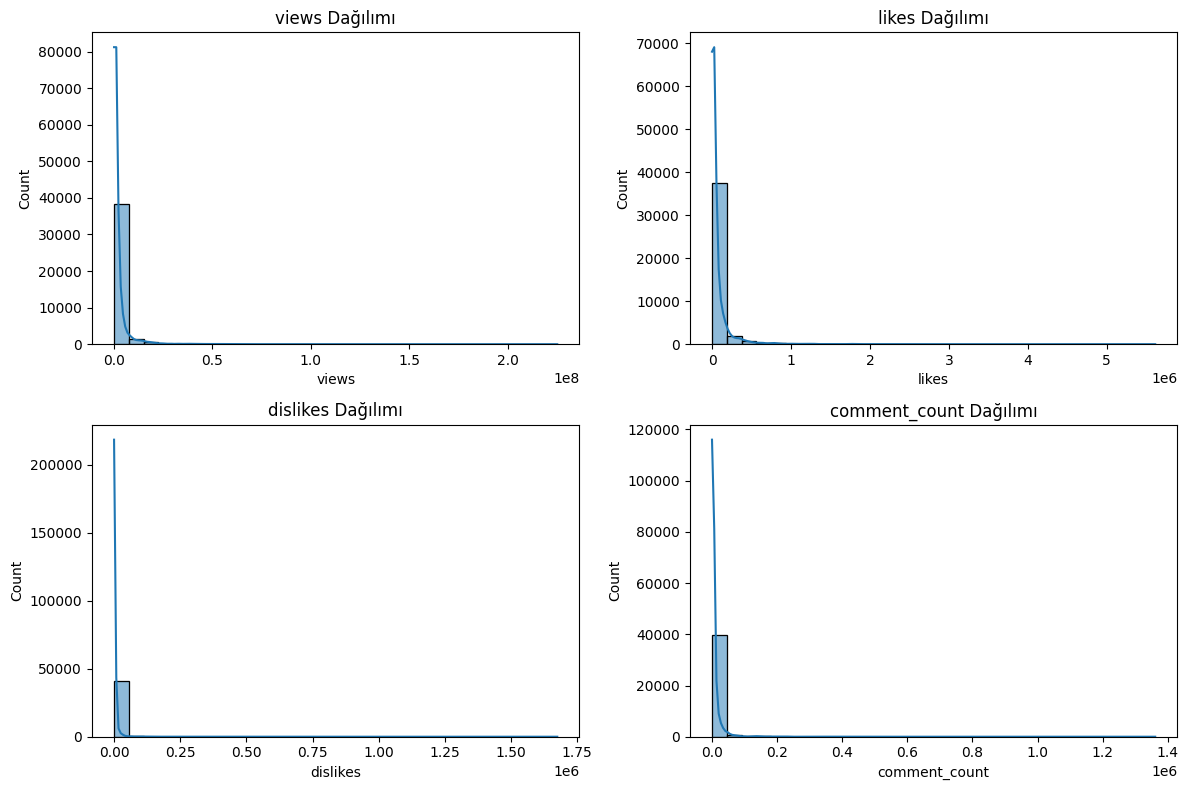

In [10]:

features = ['views', 'likes', 'dislikes', 'comment_count']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'{feature} Dağılımı')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
# İlgili sütunları seçelim
X = df[['category_id', 'views', 'likes', 'dislikes', 'comment_count']]

# Verileri ölçeklendirelim
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ölçeklendirilmiş verilerin ilk birkaç satırını gösterelim
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   category_id     views     likes  dislikes  comment_count
0     0.267905 -0.218069 -0.073137 -0.025677       0.200566
1     0.532168  0.007844  0.100131  0.083867       0.113711
2     0.400037  0.112341  0.313551  0.056067      -0.007101
3     0.532168 -0.272871 -0.280033 -0.104908      -0.168336
4     0.532168 -0.035847  0.253267 -0.059333       0.242351


# K-Means ile Kümeleme



	•	Kümeler için en uygun k değerini belirlemek için Elbow yöntemini kullanacağım.

### Elbow Yöntemi Nedir?

*Elbow yöntemi*, kümeleme (*clustering*) analizlerinde, özellikle K-Ortalamalar (*K-Means*) algoritmasında en uygun küme sayısını belirlemek için kullanılan bir yöntemdir. Yöntemin amacı, modelin doğruluğunu artırmak ve aşırı ya da yetersiz kümelenmenin önüne geçmektir.

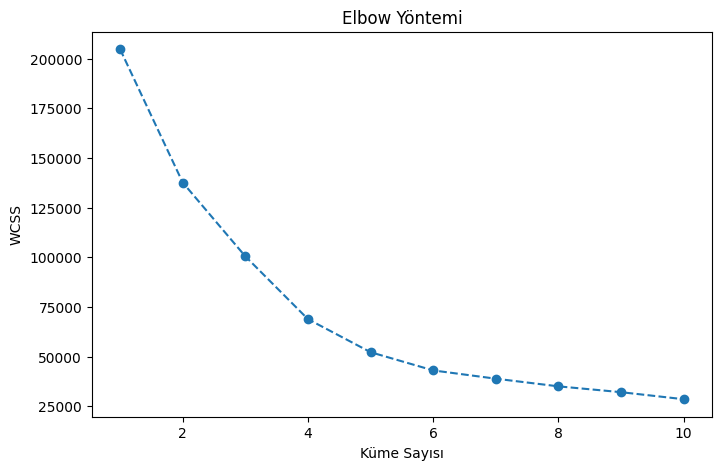

In [20]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

Bu grafiğe bakarak optimum küme sayısının **4** olduğunu söyleyebilirim. Çünkü grafikte *WCSS* (*Within-Cluster Sum of Squares*) değeri **4** kümeden sonra azalma eğilimini sürdürüyor, ancak bu azalma belirgin bir şekilde yavaşlıyor. Yani, **4 kümeden** sonra *WCSS* değerinde daha küçük ve marjinal düşüşler var, bu da **4**'ün dirsek noktası (*elbow point*) olduğunu gösteriyor.

Bu durumda, optimum küme sayısı **4** olarak belirlenebilir.

# K-Means Modelini Eğitme ve Kümeleri Görselleştirme

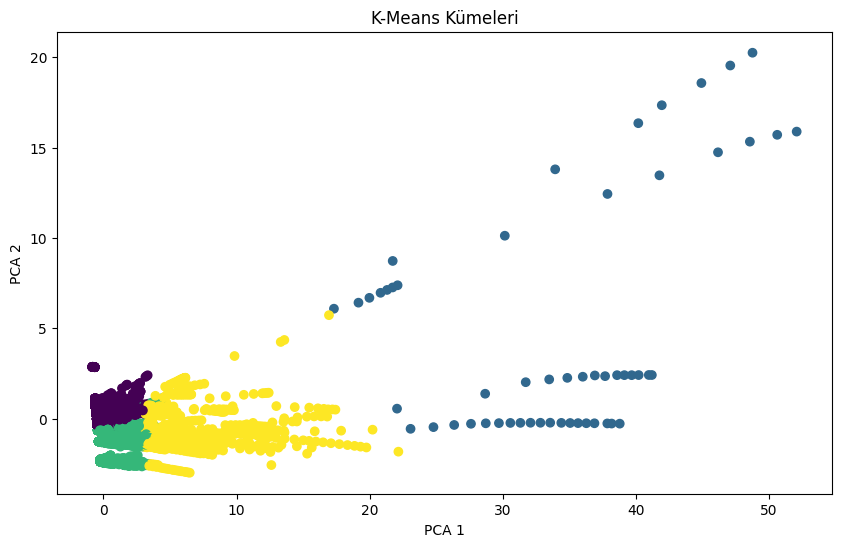

In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Kümeleri ekleyelim
df['Cluster'] = kmeans.labels_

# Kümeleri görselleştirmek için PCA kullanarak boyut indirgeyelim
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Kümeleri')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Küme Özelliklerinin Analizi

In [23]:
# Sadece sayısal sütunları seçelim
numeric_cols = df.select_dtypes(include=[np.number])

# Kümeye göre sayısal sütunların ortalamasını alalım
cluster_summary = df.groupby('Cluster')[numeric_cols.columns].mean()

print(cluster_summary)

         category_id         views         likes       dislikes  \
Cluster                                                           
0          23.927738  1.261400e+06  3.787862e+04    1861.291449   
1          16.000000  1.067314e+08  3.603858e+06  552641.814815   
2           8.132598  2.779108e+06  8.994814e+04    3026.131980   
3          13.266839  3.311692e+07  1.063923e+06   46825.075130   

         comment_count  Cluster  
Cluster                          
0          4745.554131      0.0  
1        780443.833333      1.0  
2          7557.669071      2.0  
3        111455.882124      3.0  


Yukarıdaki verileri göz önünde bulundurarak yaptığım çıkarımlar şunlar.
---

### **Küme 0:**
- **Ortalama kategori numarası**: 23.93
  - Bu, Küme 0'da yer alan videoların genellikle kategori 24'e (örneğin eğlence, komedi gibi) ait olduğunu gösteriyor.
- **Ortalama izlenme sayısı**: 1.26 milyon
  - Bu kümede yer alan videolar orta derecede izlenme sayısına sahip.
- **Ortalama beğeni sayısı**: 37,878
  - Orta düzeyde beğeni almış videolar. İzlenme sayısına göre beğeni sayısı da dengeli görünüyor.
- **Ortalama beğenmeme sayısı**: 1,861
  - Düşük bir beğenmeme sayısına sahip, yani içerikler genel olarak olumlu karşılanıyor.
- **Ortalama yorum sayısı**: 4,746
  - Orta düzeyde bir etkileşim oranı olan videolar. Yorum sayıları da izlenme oranıyla uyumlu.

Bu küme, **orta popülerlikteki** videoları temsil ediyor. İzlenme, beğeni ve yorum oranları dengeli ve görece düşük. Kategorisi muhtemelen eğlence, mizah gibi alanlar olabilir.

---

### **Küme 1:**
- **Ortalama kategori numarası**: 16.0
  - Bu, Küme 1'deki videoların tamamının kategori 16'ya ait olduğunu gösteriyor. (Bu kategori muhtemelen müzik videolarını temsil ediyor olabilir.)
- **Ortalama izlenme sayısı**: 106.73 milyon
  - Küme 1’deki videolar aşırı yüksek izlenme sayılarına sahip, bu da bu videoların **viral** ya da çok **popüler** içerikler olduğunu gösteriyor.
- **Ortalama beğeni sayısı**: 3.60 milyon
  - Beğeni sayısı da oldukça yüksek. Videolar izleyici tarafından büyük bir ilgi görüyor.
- **Ortalama beğenmeme sayısı**: 552,641
  - Beğenmeme sayısı oldukça yüksek, bu videoların büyük izleyici kitlesinden bazıları tarafından olumsuz karşılandığını gösteriyor.
- **Ortalama yorum sayısı**: 780,444
  - Yorum sayısı oldukça fazla. Bu, videoların geniş çapta tartışıldığını ve izleyiciler arasında yoğun bir etkileşim yarattığını gösteriyor.

Bu küme, **çok popüler, viral** videolardan oluşuyor. İzlenme, beğeni ve yorumlar son derece yüksek, ancak beğenmeme oranları da dikkat çekici bir şekilde yüksek, bu da videoların kutuplaştırıcı olabileceğini gösteriyor. 

---

### **Küme 2:**
- **Ortalama kategori numarası**: 8.13
  - Bu kümede yer alan videolar genellikle kategori 8’e (örneğin, eğitim veya bilgilendirici videolar gibi ) ait.
- **Ortalama izlenme sayısı**: 2.78 milyon
  - Bu kümede yer alan videolar, **orta-yüksek** izlenme sayılarına sahip.
- **Ortalama beğeni sayısı**: 89,948
  - Oldukça yüksek bir beğeni sayısı var, bu da bu videoların izleyiciler tarafından beğenildiğini gösteriyor.
- **Ortalama beğenmeme sayısı**: 3,026
  - Görece düşük bir beğenmeme oranına sahip. Bu içerikler genel olarak olumlu karşılanıyor.
- **Ortalama yorum sayısı**: 7,558
  - Yorum sayısı makul düzeyde, içerikler ilgi çekiyor ancak çok büyük bir etkileşim yaratmıyor.

Bu küme, izlenme ve beğeni sayıları **orta-üst** seviyede olan, daha **rahat izlenen** içeriklerden oluşuyor. İzleyici kitlesi bu videoları genellikle olumlu karşılıyor ve çok fazla kutuplaşma yaşamıyor.

---

### **Küme 3:**
- **Ortalama kategori numarası**: 13.27
  - Bu küme, genellikle kategori 13 (örneğin, teknoloji veya bilim gibi) içeriklerine ait videoları kapsıyor.
- **Ortalama izlenme sayısı**: 33.12 milyon
  - Bu kümedeki videolar yüksek izlenme sayılarına sahip, ancak Küme 1’deki kadar viral değiller.
- **Ortalama beğeni sayısı**: 1.06 milyon
  - Beğeni sayısı oldukça yüksek, videolar izleyiciler tarafından genel olarak seviliyor.
- **Ortalama beğenmeme sayısı**: 46,825
  - Orta düzeyde bir beğenmeme oranı var. Bu içerikler bazı izleyiciler tarafından eleştiriliyor.
- **Ortalama yorum sayısı**: 111,456
  - Yorum sayısı yüksek, bu da içeriklerin izleyici kitlesi arasında **büyük bir etkileşim** yarattığını gösteriyor.

Bu küme, **yüksek popülerlikte** olan videoları temsil ediyor. İzleyici kitlesi videoları beğeniyor ve yorum yapma oranı yüksek. Bu videolar, genellikle **eğitim, belgesel** gibi izleyici kitlesiyle etkileşim kuran içeriklerden oluşabilir.

---

### **Genel Yorum:**
- **Küme 0**: Orta düzey izlenme ve etkileşim oranlarına sahip, daha **dengeli** videoları kapsıyor.
- **Küme 1**: Aşırı popüler, viral olmuş, büyük izleyici kitlesi tarafından sevilen ama aynı zamanda beğenmeme oranı da yüksek olan **kutupsal** videoları içeriyor.
- **Küme 2**: Orta-yüksek izlenme ve etkileşim oranına sahip, izleyici tarafından genel olarak olumlu karşılanan videoları içeriyor.
- **Küme 3**: Yüksek popülerlikte, **izleyici kitlesiyle yoğun etkileşim** yaratan, beğenilen ama bazı eleştiriler alan videoları temsil ediyor.
